In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
user_song = pd.read_csv('./data/subset_song_taste.csv')

In [4]:
user_song.shape

(772661, 24)

In [5]:
len(user_song.user_id.unique()), len(user_song.song_id.unique())

(418252, 3675)

In [6]:
user_song.head()

,user_id,song_id,play_count,num_songs,song_title,artist_name,artist_familiarity,artist_hotttnesss,release,song_hotttnesss,...,key_info,key_confidence,loudness,mode,mode_confidence,time_signature,time_signature_confidence,tempo,energy,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOWEZSI12A81C21CE6,1,1,Tu Quieres Volver,Gipsy Kings,0.710446,0.540631,Greatest Hits,0.778821,...,5,0.351,-8.403,0,0.318,1,0.034,165.006,0.0,1987
1,833c530ecda3d99deb8395f70400aa3999783d91,SOWEZSI12A81C21CE6,2,1,Tu Quieres Volver,Gipsy Kings,0.710446,0.540631,Greatest Hits,0.778821,...,5,0.351,-8.403,0,0.318,1,0.034,165.006,0.0,1987
2,d6c5bd2b570b4faf8964d7ed04f3392ff505d2be,SOWEZSI12A81C21CE6,1,1,Tu Quieres Volver,Gipsy Kings,0.710446,0.540631,Greatest Hits,0.778821,...,5,0.351,-8.403,0,0.318,1,0.034,165.006,0.0,1987
3,724534729c9f5dc72a009269c2c225883e4775d2,SOWEZSI12A81C21CE6,1,1,Tu Quieres Volver,Gipsy Kings,0.710446,0.540631,Greatest Hits,0.778821,...,5,0.351,-8.403,0,0.318,1,0.034,165.006,0.0,1987
4,ee7aa84c164038c963cfd02a7e52a5598aa470c3,SOWEZSI12A81C21CE6,2,1,Tu Quieres Volver,Gipsy Kings,0.710446,0.540631,Greatest Hits,0.778821,...,5,0.351,-8.403,0,0.318,1,0.034,165.006,0.0,1987


In [7]:
user_song.columns

Index([u'user_id', u'song_id', u'play_count', u'num_songs', u'song_title',
       u'artist_name', u'artist_familiarity', u'artist_hotttnesss', u'release',
       u'song_hotttnesss', u'analysis_sample_rate', u'duration',
       u'danceability', u'end_of_fade_in', u'key_info', u'key_confidence',
       u'loudness', u'mode', u'mode_confidence', u'time_signature',
       u'time_signature_confidence', u'tempo', u'energy', u'year'],
      dtype='object')

In [17]:
user_song.energy.describe()

count    766596.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: energy, dtype: float64

In [8]:
user_song.tempo.describe()

count    772661.000000
mean        126.560860
std          31.789887
min           0.000000
25%         102.984000
50%         121.884000
75%         146.022000
max         253.357000
Name: tempo, dtype: float64

In [9]:
df_mode = user_song.groupby('mode')['play_count'].sum()

In [10]:
df_mode

mode
0     750269
1    1323816
Name: play_count, dtype: int64

In [11]:
df_time_sig = user_song.groupby('time_signature')['play_count'].sum()

In [12]:
df_time_sig

time_signature
0         43
1     214218
3     181519
4    1529686
5     123933
7      24686
Name: play_count, dtype: int64

In [13]:
# Filter out song which duration is over 10 mins (600s)
user_song = user_song[user_song['duration'] < 600]
#user_song = user_song[user_song['play_count'] < 20]

In [14]:
user_song.shape

(766596, 24)

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


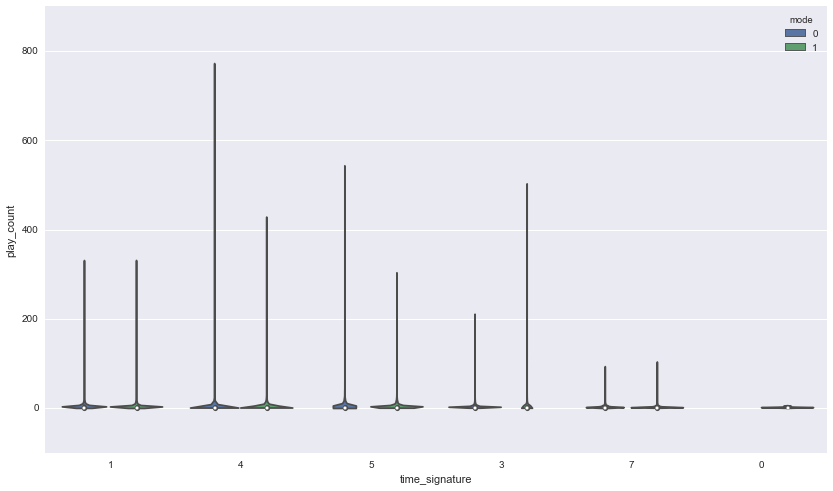

In [15]:
plt.rcParams['figure.figsize'] = (14, 8)
plt.subplot(111)
sns.violinplot(x="time_signature", y="play_count", hue="mode", data=user_song);

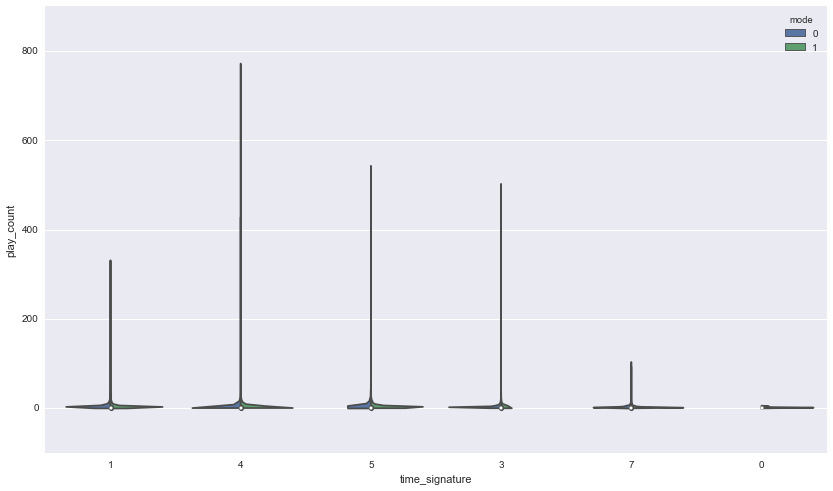

In [16]:
sns.violinplot(x="time_signature", y="play_count", hue="mode", data=user_song, split=True);

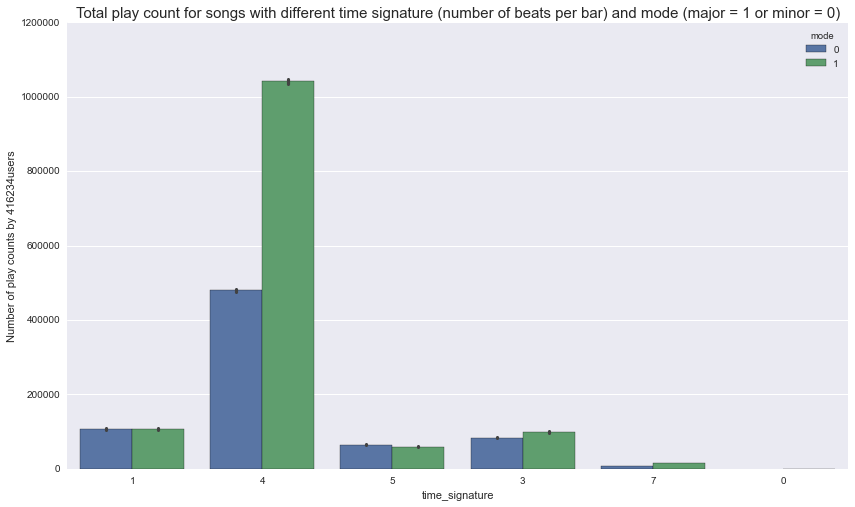

In [40]:
plt.rcParams['figure.figsize'] = (14, 8)
plt.subplot(111)
ax = sns.barplot(x="time_signature", y="play_count", hue="mode", data=user_song, estimator=sum)
ax.set(ylabel='Number of play counts by ' + str(len(user_song.user_id.unique())) + 'users')
ax.set_title("Total play count for songs with different time signature (number of beats per bar) and mode (major = 1 or minor = 0)", size=15)
plt.savefig("image1.png")

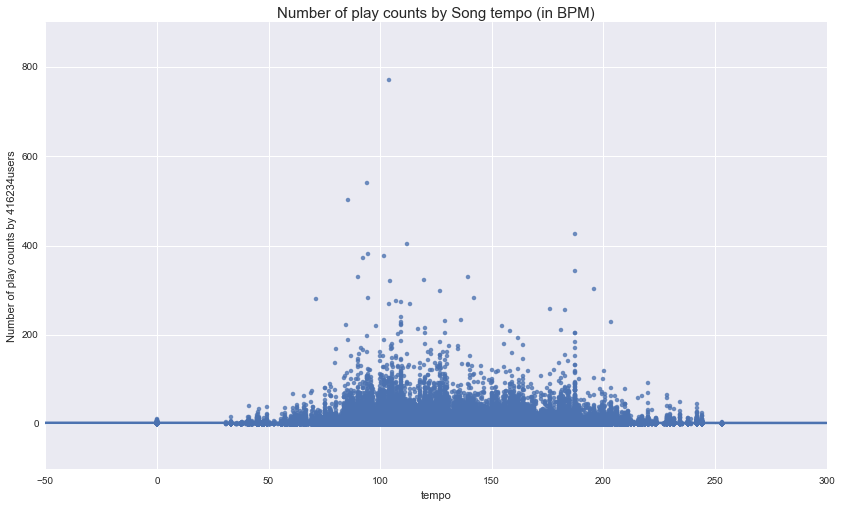

In [41]:
ax = sns.regplot(x="tempo", y="play_count", data=user_song)
ax.set(ylabel='Number of play counts by ' + str(len(user_song.user_id.unique())) + 'users')
ax.set_title("Number of play counts by Song tempo (in BPM)", size=15)
plt.savefig("image2.png")

In [23]:
df_song_info = pd.read_csv('./data/subset_song_info.csv')

In [24]:
df_song_info.shape

(10000, 22)

In [25]:
df_song_info.head()

,song_id,num_songs,song_title,artist_name,artist_familiarity,artist_hotttnesss,release,song_hotttnesss,analysis_sample_rate,duration,...,key_info,key_confidence,loudness,mode,mode_confidence,time_signature,time_signature_confidence,tempo,energy,year
0,SOMZWCG12A8C13C480,1,I Didn't Mean To,Casual,0.581794,0.401998,Fear Itself,0.602120,22050,218.93179,...,1,0.736,-11.197,0,0.636,4,0.778,92.198,0.0,0
1,SOCIWDW12A8C13D406,1,Soul Deep,The Box Tops,0.630630,0.417500,Dimensions,NaN,22050,148.03546,...,6,0.169,-9.843,0,0.430,4,0.384,121.274,0.0,1969
2,SOXVLOJ12AB0189215,1,Amor De Cabaret,Sonora Santanera,0.487357,0.343428,Las Numero 1 De La Sonora Santanera,NaN,22050,177.47546,...,8,0.643,-9.689,1,0.565,1,0.000,100.070,0.0,0
3,SONHOTT12A8C13493C,1,Something Girls,Adam Ant,0.630382,0.454231,Friend Or Foe,NaN,22050,233.40363,...,0,0.751,-9.013,1,0.749,4,0.000,119.293,0.0,1982
4,SOFSOCN12A8C143F5D,1,Face the Ashes,Gob,0.651046,0.401724,Muertos Vivos,0.604501,22050,209.60608,...,2,0.092,-4.501,1,0.371,4,0.562,129.738,0.0,2007


In [27]:
df_song_info.columns

Index([u'song_id', u'num_songs', u'song_title', u'artist_name',
       u'artist_familiarity', u'artist_hotttnesss', u'release',
       u'song_hotttnesss', u'analysis_sample_rate', u'duration',
       u'danceability', u'end_of_fade_in', u'key_info', u'key_confidence',
       u'loudness', u'mode', u'mode_confidence', u'time_signature',
       u'time_signature_confidence', u'tempo', u'energy', u'year'],
      dtype='object')

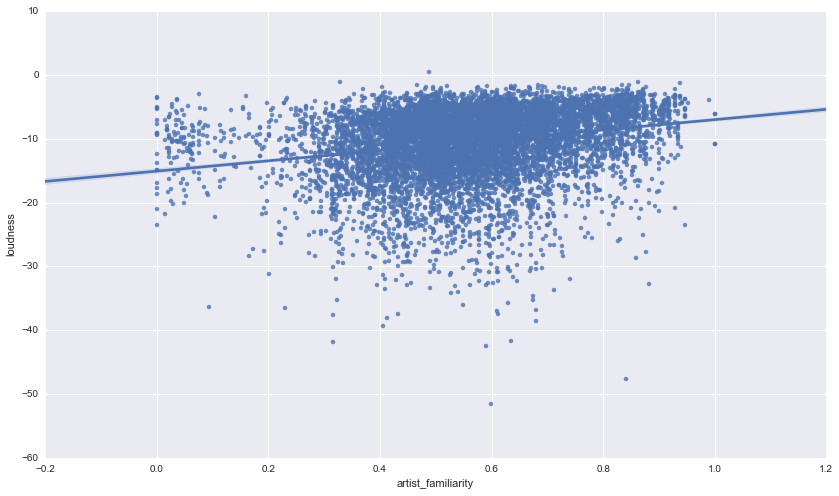

In [30]:
sns.regplot(x="artist_familiarity", y="loudness", data=df_song_info)

In [ ]:
user_song.play_count.describe()

In [ ]:
sns.boxplot(user_song.play_count)

In [ ]:
user_song.tempo.hist()

In [ ]:
# Clean data
# 1. Song that has usually high and low duration
# 2. Add feature number of year the song was released

In [ ]:
user_song.isnull().sum()

In [ ]:
user_song = user_song.fillna(-1)

In [ ]:
user_song['num_year'] = 2016 - user_song['year']

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
sns.boxplot(user_song.duration)

In [ ]:
user_song.shape, len(user_song.song_id.unique()), len(user_song.user_id.unique())

In [ ]:
# Filter out song which duration is over 10 mins (600s)
user_song = user_song[user_song['duration'] < 600]

In [ ]:
user_song.shape, len(user_song.song_id.unique()), len(user_song.user_id.unique())

In [ ]:
user_song['mode_tone'] = user_song['mode'] * user_song['mode_confidence']

In [ ]:
features = ['artist_familiarity','artist_hotttnesss','song_hotttnesss','end_of_fade_in','key_info','key_confidence', \
            'loudness','mode','time_signature','tempo']

In [ ]:
user_preference = user_song.groupby('user_id')[features].mean()

In [ ]:
user_preference.shape

In [ ]:
user_preference.head()

In [ ]:
user_preference.tempo.hist()

In [ ]:
user_preference.plot.scatter('time_signature', 'tempo')

In [ ]:
user_preference.plot.scatter('mode_confidence', 'tempo')

In [ ]:
user_preference.plot.scatter('artist_familiarity', 'tempo')

In [ ]:
user_preference.plot.scatter('loudness', 'tempo')

In [ ]:
user_preference.plot.scatter('mode', 'tempo')

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
train = user_preference[features]

In [ ]:
train.shape

In [ ]:
cluster_model = KMeans(n_clusters=10)

In [ ]:
cluster_model.fit(train)

In [ ]:
cluster_model.labels_

In [ ]:
np.bincount(cluster_model.labels_)

In [ ]:
cluster_model.cluster_centers_